In [1]:
import pandas as pd
import re
pd.set_option('display.max_columns', None)

# Funções

In [113]:
def transform_float(x):
    if x != None:
        try:
            return float(x)
        except:
            x = x.strip(' ')
            x = re.sub(r',', '.', x)
            return float(x)
    else:
        return 0 

# Bens de Candidatos

In [ ]:
f = open("bem_candidato_2020/bem_PB_txt", "r", encoding="utf8")
texto = f.readlines()
lst_aux = [re.sub(r'\n',' ',re.sub(r'"', ' ', element)).split(';') for element in texto]
df_pb = pd.DataFrame(lst_aux[1:], columns = lst_aux[0]) 
#df_pb = pd.read_csv('bem_candidato_2020/bem_candidato_2020_PB.csv',error_bad_lines=False, encoding='latin-1',delimiter =';')

In [42]:
df_pb.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,NR_ORDEM_CANDIDATO,CD_TIPO_BEM_CANDIDATO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,DT_ULTIMA_ATUALIZACAO,HH_ULTIMA_ATUALIZACAO
0,20/10/2020,07:06:40,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,PB,19666,JOCA CLAUDINO,150000633249,1,24,Bem relacionado com o exercício da atividade ...,TITULAR PROL EQUIPAMENTOS LOGISTICOS EIRELI C...,"200000,00",17/10/2020,18:52:47
1,20/10/2020,07:06:40,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,PB,19666,JOCA CLAUDINO,150000633249,2,63,Dinheiro em espécie - moeda nacional,RENDIMENTOS TRIBUTÁRIOS RECEBIDOS DE PESSOA F...,"28500,00",17/10/2020,18:52:47
2,20/10/2020,07:06:40,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,PB,19666,JOCA CLAUDINO,150000633250,1,63,Dinheiro em espécie - moeda nacional,Rendimentos Tributários Recebidos de Pessoa J...,"2060,64",17/10/2020,17:56:20
3,20/10/2020,07:06:40,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,PB,19666,JOCA CLAUDINO,150000633250,2,63,Dinheiro em espécie - moeda nacional,Rendimentos Tributário Recebidos de Pessoa Ju...,"7065,74",17/10/2020,17:56:20
4,20/10/2020,07:06:40,2020,2,Eleição Ordinária,426,Eleições Municipais 2020,15/11/2020,PB,21075,NOVA PALMEIRA,150000633290,1,11,Apartamento,"Apartamento localizado na Rua Espírito Santo,...","90000,00",01/10/2020,17:44:03


In [65]:
# - Altera tipo da coluna VR_BEM_CANDIDATO
df_pb[' VR_BEM_CANDIDATO '] = df_pb[' VR_BEM_CANDIDATO '].apply(lambda x: transform_float(x))

In [46]:
# - Cria lista de bens por candidato
df_bens = df_pb.groupby(' SQ_CANDIDATO ')[' DS_TIPO_BEM_CANDIDATO '].apply(list)

In [77]:
# - Soma valor em bens por candidato
df_bens_vlr = df_pb.groupby(' SQ_CANDIDATO ').agg({' VR_BEM_CANDIDATO ': ['sum']}).reset_index()
df_bens_vlr.columns = ['SQ_CANDIDATO','SUM_VR_BEM_CANDIDATO']

In [104]:
# - Altera tipo da coluna SQ_CANDIDATO para posterior merge
df_bens_vlr['SQ_CANDIDATO'] = df_bens_vlr['SQ_CANDIDATO'].astype('int64')

# Lista de Candidatos

In [101]:
df_lista = pd.read_csv('consulta_cand_2020/consulta_cand_2020_PB.csv',delimiter =';', encoding='latin-1')

In [106]:
df_lista = df_lista[df_lista['NM_UE'] == 'JOÃO PESSOA']
#df_lista[(df_lista['NR_PARTIDO'] == 50) & (df_lista['NM_CANDIDATO'].str.contains('T'))]['NM_CANDIDATO'].tail()

In [107]:
df_lista.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA
39,20/10/2020,12:07:05,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,20516,JOÃO PESSOA,13,VEREADOR,150000649797,50133,JÚLIO CÉSAR FERREIRA DA SILVA,JÚLIO,#NULO#,89530136404,PSOLJPELEICOES2020@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,50,PSOL,PARTIDO SOCIALISMO E LIBERDADE,150000057746,PARTIDO ISOLADO,PSOL,1,BRASILEIRA NATA,PE,-3,RECIFE,03/03/1973,47,39610400833,2,MASCULINO,5,ENSINO MÉDIO INCOMPLETO,1,SOLTEIRO(A),2,PRETA,999,OUTROS,311996,-1,#NULO#,N,S,-1,6001050620206150064,-1,#NULO#,-1,#NULO#,SIM
44,20/10/2020,12:07:05,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,20516,JOÃO PESSOA,13,VEREADOR,150000979704,80180,VITÓRIA OHARA MEIRELES DIAS,VITÓRIA OHARA,#NULO#,10439162459,CONTATO.VITORIAOHARA@GMAIL.COM,1,CADASTRADO,8,AGUARDANDO JULGAMENTO,PARTIDO ISOLADO,80,UP,UNIDADE POPULAR,150000114379,PARTIDO ISOLADO,UP,1,BRASILEIRA NATA,PE,-3,GOIANA,23/03/2000,20,46139061201,4,FEMININO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),3,PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",311996,-1,#NULO#,N,S,-1,6005277820206150064,-1,#NULO#,-1,#NULO#,NÃO
49,20/10/2020,12:07:05,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,20516,JOÃO PESSOA,13,VEREADOR,150001007308,12377,GILVANDRO SOARES DA SILVA,GILVANDRO SILVA,#NULO#,4081085412,GILVANDROVASO@GMAIL.COM,1,CADASTRADO,8,AGUARDANDO JULGAMENTO,PARTIDO ISOLADO,12,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,150000118455,PARTIDO ISOLADO,PDT,1,BRASILEIRA NATA,PB,-3,JOÃO PESSOA,15/07/1979,41,27052241295,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),3,PARDA,999,OUTROS,311996,-1,#NULO#,N,S,-1,6005736720206150064,-1,#NULO#,-1,#NULO#,NÃO
53,20/10/2020,12:07:05,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,20516,JOÃO PESSOA,13,VEREADOR,150000817586,51800,ANDRÉ LUÍS DOS SANTOS SILVA,ANDRE LUIS,#NULO#,51843188449,ANDRELUIS51@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,150000085198,PARTIDO ISOLADO,PATRIOTA,1,BRASILEIRA NATA,PB,-3,JOÃO PESSOA,28/12/1967,53,260031279,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,266,PROFESSOR DE ENSINO MÉDIO,311996,-1,#NULO#,N,S,-1,6003363320206150064,-1,#NULO#,-1,#NULO#,SIM
55,20/10/2020,12:07:05,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,20516,JOÃO PESSOA,13,VEREADOR,150000817584,51051,JACKSON EVANGELISTA SOUSA DA SILVA,JACKSON EVANGELISTA,#NULO#,4620014400,JACKSONEVANGELISTA51@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,150000085198,PARTIDO ISOLADO,PATRIOTA,1,BRASILEIRA NATA,PB,-3,JOÃO PESSOA,04/02/1983,37,32683841279,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,999,OUTROS,311996,-1,#NULO#,N,S,-1,6003380320206150064,-1,#NULO#,-1,#NULO#,SIM


# Merge Lista e Bens

In [112]:
df_final = df_lista.merge(df_bens_vlr,on='SQ_CANDIDATO')

In [114]:
df_final.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,SG_UF,SG_UE,NM_UE,CD_CARGO,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,CD_SITUACAO_CANDIDATURA,DS_SITUACAO_CANDIDATURA,CD_DETALHE_SITUACAO_CAND,DS_DETALHE_SITUACAO_CAND,TP_AGREMIACAO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,DS_NACIONALIDADE,SG_UF_NASCIMENTO,CD_MUNICIPIO_NASCIMENTO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,NR_TITULO_ELEITORAL_CANDIDATO,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_DECLARAR_BENS,NR_PROTOCOLO_CANDIDATURA,NR_PROCESSO,CD_SITUACAO_CANDIDATO_PLEITO,DS_SITUACAO_CANDIDATO_PLEITO,CD_SITUACAO_CANDIDATO_URNA,DS_SITUACAO_CANDIDATO_URNA,ST_CANDIDATO_INSERIDO_URNA,SUM_VR_BEM_CANDIDATO
0,20/10/2020,12:07:05,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,20516,JOÃO PESSOA,13,VEREADOR,150000817586,51800,ANDRÉ LUÍS DOS SANTOS SILVA,ANDRE LUIS,#NULO#,51843188449,ANDRELUIS51@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,150000085198,PARTIDO ISOLADO,PATRIOTA,1,BRASILEIRA NATA,PB,-3,JOÃO PESSOA,28/12/1967,53,260031279,2,MASCULINO,8,SUPERIOR COMPLETO,1,SOLTEIRO(A),1,BRANCA,266,PROFESSOR DE ENSINO MÉDIO,311996,-1,#NULO#,N,S,-1,6003363320206150064,-1,#NULO#,-1,#NULO#,SIM,153000.00
1,20/10/2020,12:07:05,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,20516,JOÃO PESSOA,13,VEREADOR,150000817584,51051,JACKSON EVANGELISTA SOUSA DA SILVA,JACKSON EVANGELISTA,#NULO#,4620014400,JACKSONEVANGELISTA51@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,150000085198,PARTIDO ISOLADO,PATRIOTA,1,BRASILEIRA NATA,PB,-3,JOÃO PESSOA,04/02/1983,37,32683841279,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,999,OUTROS,311996,-1,#NULO#,N,S,-1,6003380320206150064,-1,#NULO#,-1,#NULO#,SIM,154581.25
2,20/10/2020,12:07:05,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,20516,JOÃO PESSOA,13,VEREADOR,150001026002,35777,FRANCISCO RINALDO MARANHÃO DE FIGUEIREDO,RINALDO MARANHÃO,#NULO#,2925572480,RINALDOMARANHAO@GMAIL.COM,1,CADASTRADO,8,AGUARDANDO JULGAMENTO,PARTIDO ISOLADO,35,PMB,PARTIDO DA MULHER BRASILEIRA,150000123454,PARTIDO ISOLADO,PMB,1,BRASILEIRA NATA,CE,-3,BREJO SANTO,02/10/1978,42,25693721279,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,126,ANALISTA DE SISTEMAS,311996,-1,#NULO#,N,S,-1,6007148620206150064,-1,#NULO#,-1,#NULO#,NÃO,195000.00
3,20/10/2020,12:07:05,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,20516,JOÃO PESSOA,13,VEREADOR,150000737279,70222,TANILSON TARSO NOBREGA SOARES,TANILSON SOARES,#NULO#,2075103429,AVANTEPARAIBA70@GMAIL.COM,12,APTO,2,DEFERIDO,PARTIDO ISOLADO,70,AVANTE,AVANTE,150000069293,PARTIDO ISOLADO,AVANTE,1,BRASILEIRA NATA,PB,-3,JOÃO PESSOA,12/07/1976,44,23706931279,2,MASCULINO,8,SUPERIOR COMPLETO,3,CASADO(A),1,BRANCA,278,VEREADOR,311996,-1,#NULO#,S,S,-1,6002064320206150064,-1,#NULO#,-1,#NULO#,SIM,271910.94
4,20/10/2020,12:07:05,2020,2,ELEIÇÃO ORDINÁRIA,1,426,Eleições Municipais 2020,15/11/2020,MUNICIPAL,PB,20516,JOÃO PESSOA,13,VEREADOR,150001245930,65999,JOSÉ ALBERTO CORREIA DE LIRA,BETO ART-GRADE,#NULO#,83991522420,SERRALHARIAART-GRADE@OUTLOOK.COM,1,CADASTRADO,8,AGUARDANDO JULGAMENTO,PARTIDO ISOLADO,65,PC do B,PARTIDO COMUNISTA DO BRASIL,150000154459,PARTIDO ISOLADO,PC do B,1,BRASILEIRA NATA,PB,-3,ARAÇAGI,19/03/1970,50,19831431295,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,239,SERRALHEIRO,311996,-1,#NULO#,N,S,-1,6007988720206150064,-1,#NULO#,-1,#NULO#,NÃO,16000.00


In [142]:
df_sum_bens_por_partido = df_final.groupby('NR_PARTIDO').agg({'SUM_VR_BEM_CANDIDATO': ['sum']}).reset_index()
df_sum_bens_por_partido.columns = ['Partido','Soma de Bens']

In [143]:
df_sum_bens_por_partido['Partido'] = df_sum_bens_por_partido['Partido'].astype(str)

In [144]:
df_sum_bens_por_partido.sort_values(by = 'Soma de Bens',inplace=True)

In [147]:
df_sum_bens_por_partido.head()

,Partido,Soma de Bens
13,29,8500.00
14,33,193500.00
24,80,209523.00
8,20,871980.23
19,50,1174964.89


# Plot

In [145]:
import matplotlib.pyplot as plt
import squarify 

import plotly.express as px

In [148]:
fig = px.bar(df_sum_bens_por_partido, x='Partido', y='Soma de Bens',color='Soma de Bens')
fig.show()

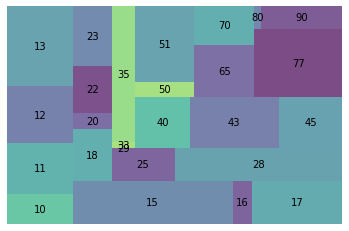

<Figure size 1440x720 with 0 Axes>

In [126]:
# If you have 2 lists
squarify.plot(sizes=df_sum_bens_por_partido.sum_bens_por_partido, label=df_sum_bens_por_partido.index, alpha=.7 )
plt.axis('off')
plt.show()